<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Load-signal" data-toc-modified-id="Load-signal-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load signal</a></span></li><li><span><a href="#Compute-loudness" data-toc-modified-id="Compute-loudness-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Compute loudness</a></span></li></ul></div>



# How to compute acoustic Loudness according to Zwicker method for time-varying signals
This tutorial explains how to use MOSQITO to compute the acoustic loudness of a signal according to the Zwicker method for time_varying signals (as per ISO 532-1 section 6). For more information on the implementation and validation of the metric, you can refer to the [documentation](../docs/loudness_zwtv.md).

The following commands are used to import the necessary functions.

In [1]:
# Add MOSQITO to the Python path
import sys
sys.path.append('..')

# Import numpy
import numpy as np
# Import plot function
import matplotlib.pyplot as plt
# Import mosqito functions
from mosqito.utils import load
from mosqito.sq_metrics import loudness_zwtv

# Import MOSQITO color sheme [Optional]
from mosqito import COLORS

# To get inline plots (specific to Jupyter notebook)
%matplotlib notebook

## Load signal
In this tutorial, the signal is imported from a .wav file. The tutorial [Audio signal basic operations](./tuto_signal_basic_operations.ipynb) gives more information about the syntax of the import and the other supported file types. You can use any .wav file to perform the tutorial or you can download the [woodpecker audio recording](../validations/sq_metrics/loudness_zwtv/input/ISO_532-1/Annex%20B.5/Test%20signal%2024%20%28woodpecker%29.wav) from MOSQITO that is used in the following.

<IPython.core.display.Javascript object>


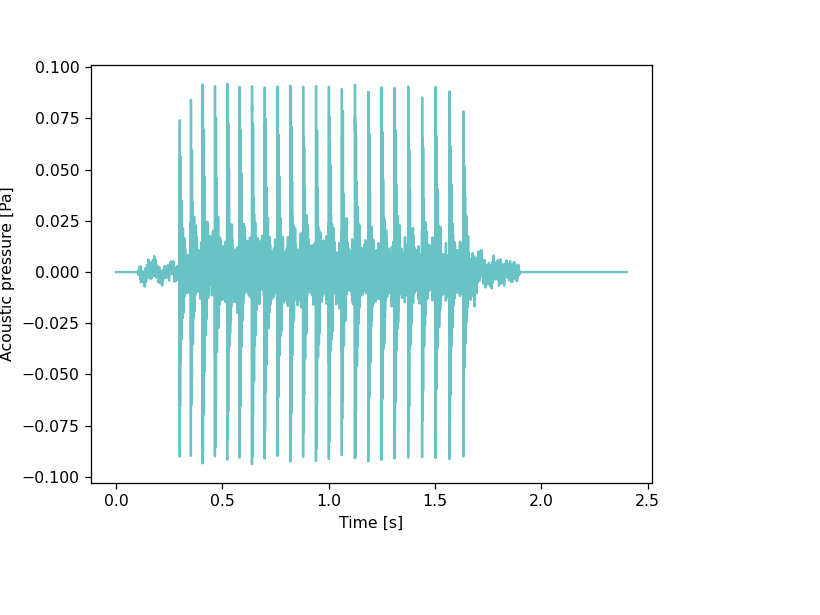

Text(0, 0.5, 'Acoustic pressure [Pa]')

In [2]:
# Define path to the .wav file
# To be replaced by your own path
path = "../validations/sq_metrics/loudness_zwtv/input/ISO_532-1/Annex B.5/Test signal 24 (woodpecker).wav"
# load signal
sig, fs = load(path, wav_calib=2 * 2 **0.5)
# plot signal
t = np.linspace(0, (len(sig) - 1) / fs, len(sig))
plt.figure(1)
plt.plot(t, sig, color=COLORS[0])
plt.xlabel('Time [s]')
plt.ylabel('Acoustic pressure [Pa]')

## Compute loudness
The acoustic loudness is computed by using the following command line. In addition to the signal (as ndarray) and the sampling frequency, the function takes one input argument, "field_type", that can be set to "free" or "diffuse" depending on the environment of the audio signal recording.

In [3]:
N, N_spec, bark_axis, time_axis = loudness_zwtv(sig, fs, field_type="free")

The loudness of the audio signal is computed as a function of time : 

<IPython.core.display.Javascript object>


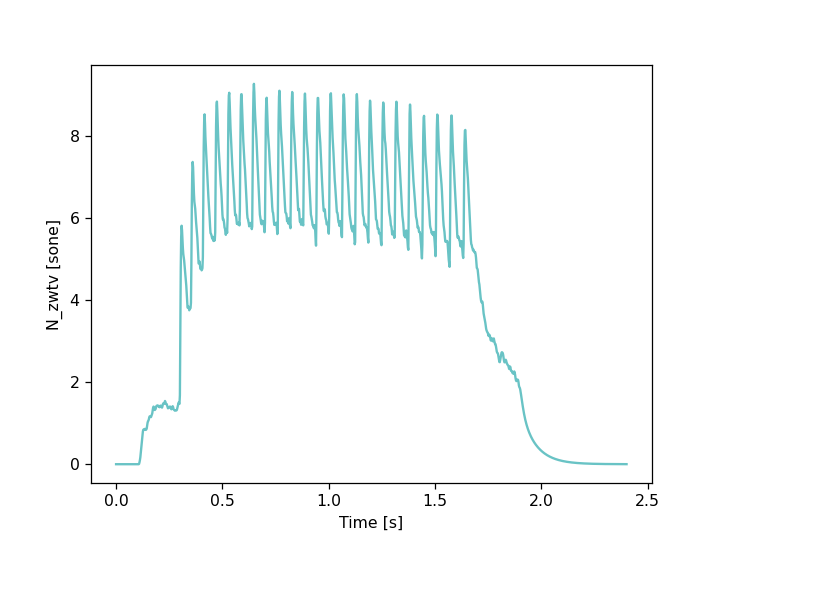

Text(0, 0.5, 'N_zwtv [sone]')

In [4]:
plt.figure(2)
plt.plot(time_axis, N, color=COLORS[0])
plt.xlabel('Time [s]')
plt.ylabel('N_zwtv [sone]')

The specific loudness over time and critical band rate is also computed. It can be plotted over critical band rate for a specific time or over time for a specific critical band rate with the following commands:

<IPython.core.display.Javascript object>


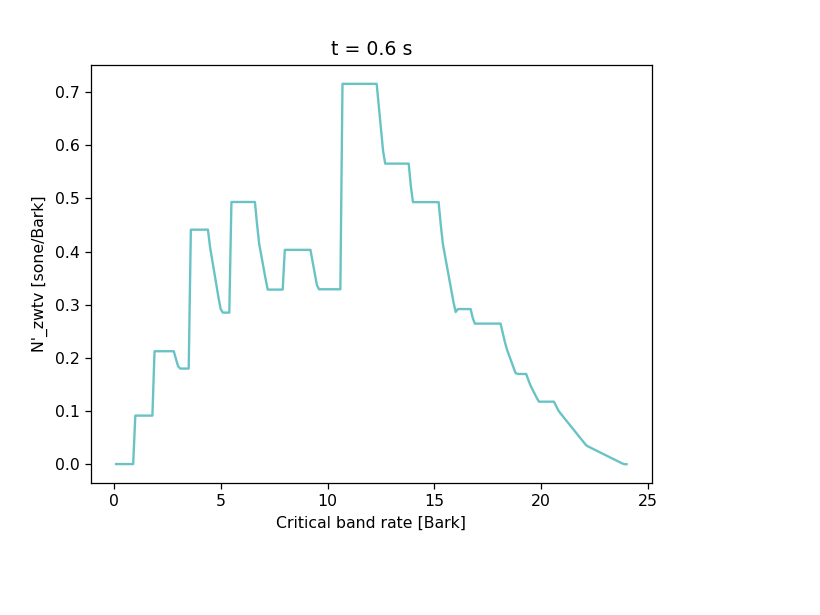

Text(0.5, 1.0, 't = 0.6 s')

In [5]:
i_time = 300
plt.figure(3)
plt.plot(bark_axis, N_spec[:, i_time], color=COLORS[0])
plt.xlabel('Critical band rate [Bark]')
plt.ylabel("N'_zwtv [sone/Bark]")
plt.title("t = {:.1f} s".format(time_axis[i_time]))

<IPython.core.display.Javascript object>


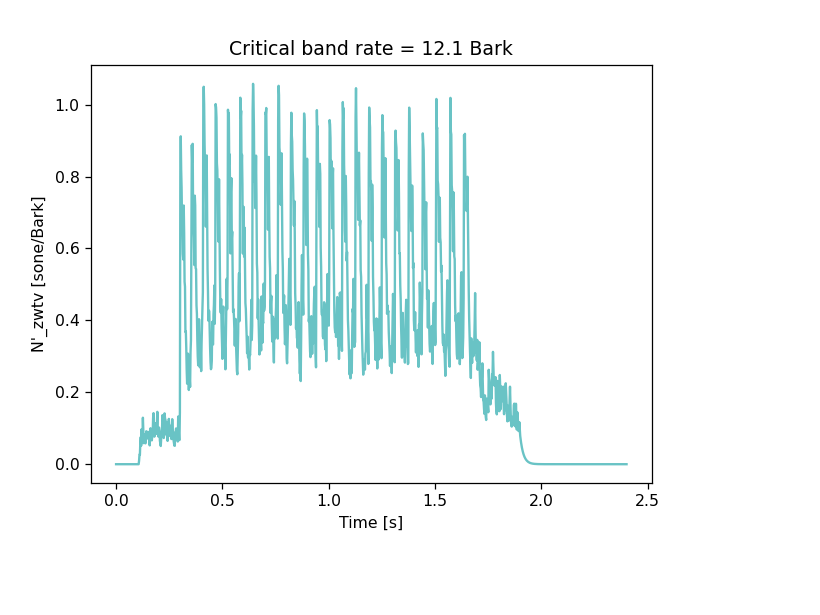

Text(0.5, 1.0, 'Critical band rate = 12.1 Bark')

In [6]:
i_bark = 120
plt.figure(4)
plt.plot(time_axis, N_spec[i_bark, :], color=COLORS[0])
plt.xlabel('Time [s]')
plt.ylabel("N'_zwtv [sone/Bark]")
plt.title("Critical band rate = {:.1f} Bark".format(bark_axis[i_bark]))

---

In [7]:
from datetime import date
print("Tutorial generation date:", date.today().strftime("%B %d, %Y"))

Tutorial generation date: March 30, 2022
